In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# load train data
data = pd.read_csv('titanic/train.csv')
data.shape

(891, 12)

In [500]:
data.info()
# print("==="*15)
# data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [501]:
# check whether there are missing data(null, np.nan ,or 0)
print("isna().sum:")
print(data.isna().sum())
# print("\nisnull().sum:")
# print(data.isnull().sum())
print("\ndata min value:")
data.min()

isna().sum:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

data min value:


C:\Users\user\AppData\Local\Temp\ipykernel_26320\60874008.py:7: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.min()


PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
dtype: object

NaN or Null：
Age            177
Cabin          687
Embarked         2

special value：
PassengerId、
Name、
Ticket

In [502]:
# remove the feature of PassengerId, Name, Ticket, and Cabin
remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data= data.drop(remove, axis=1)

# onehotencoding
data_dum = pd.get_dummies(data, columns=['Sex', 'Embarked'])
# print(data_dum)
data1 = pd.DataFrame(data_dum)
data1.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


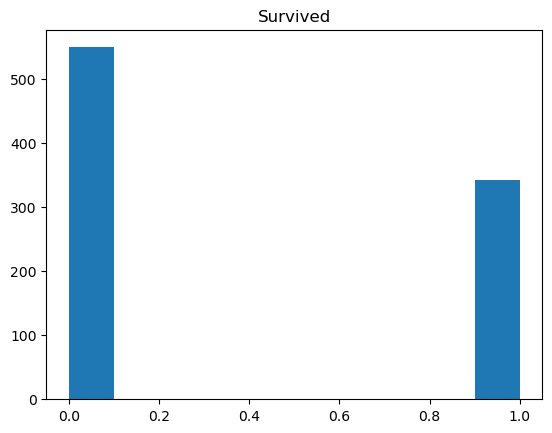

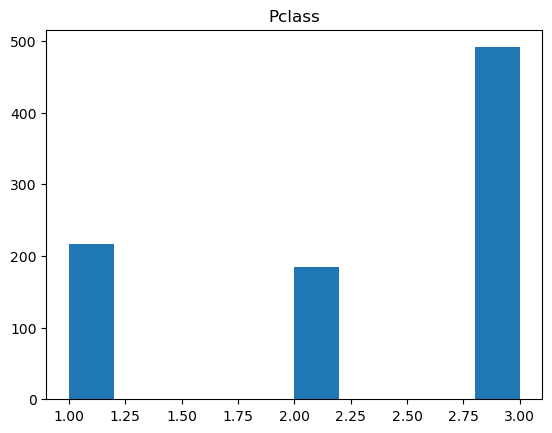

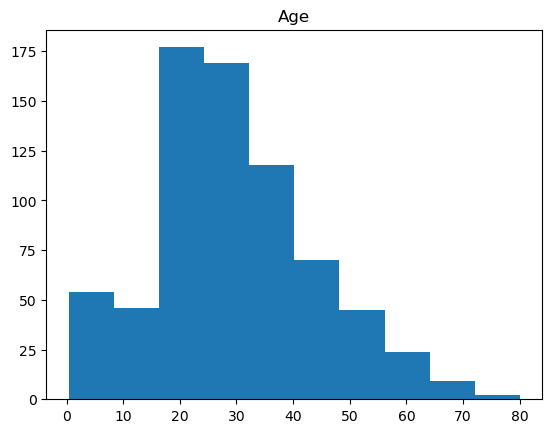

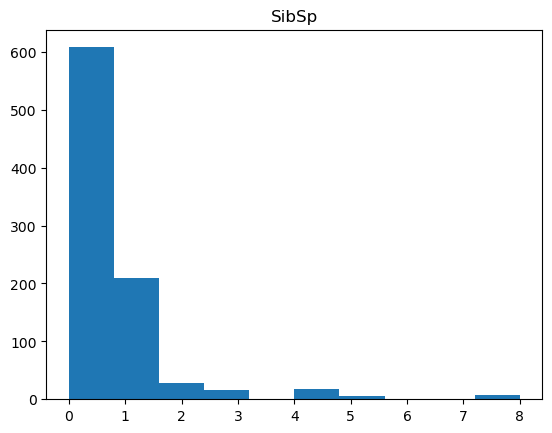

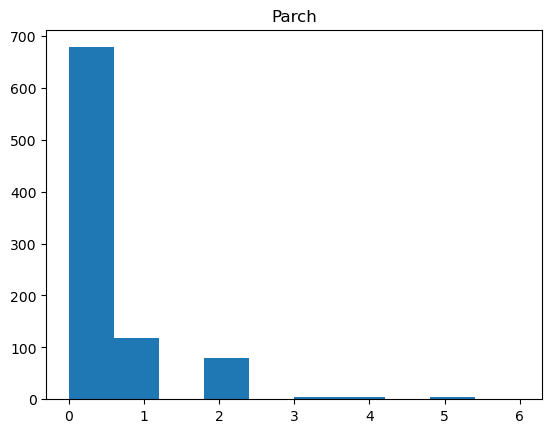

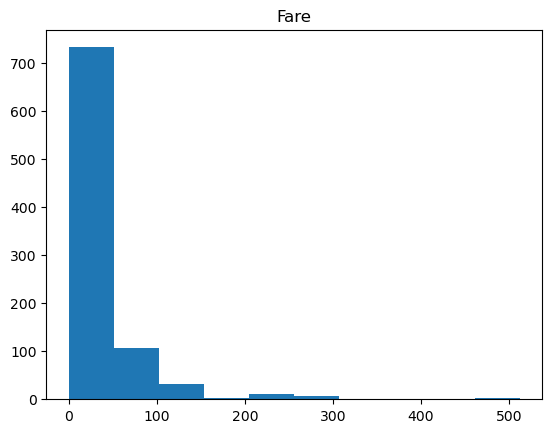

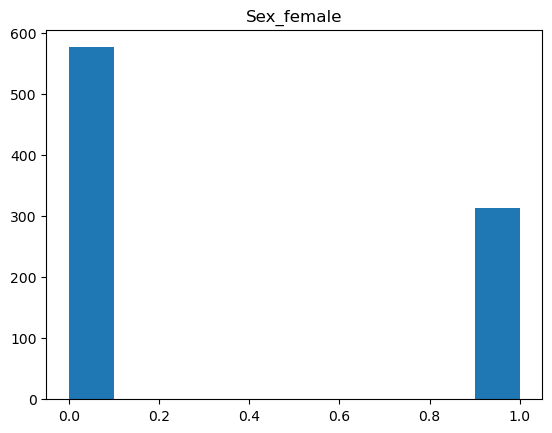

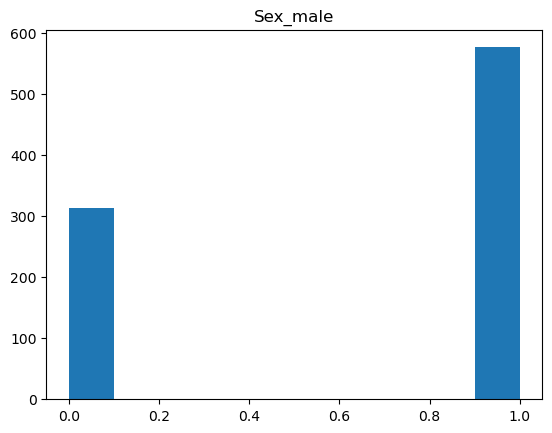

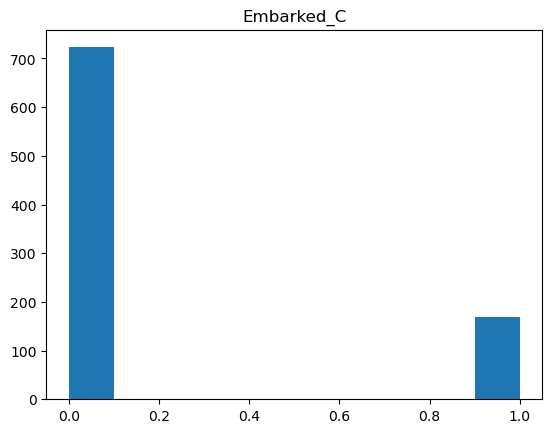

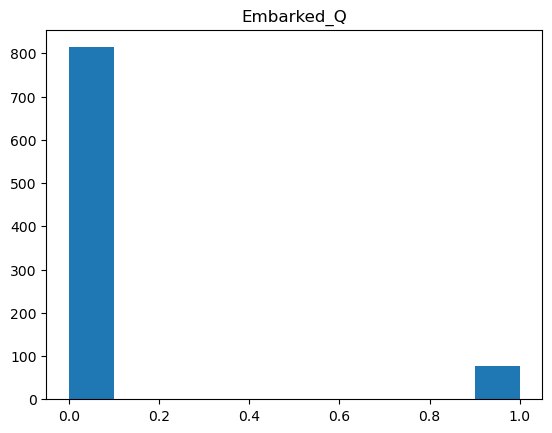

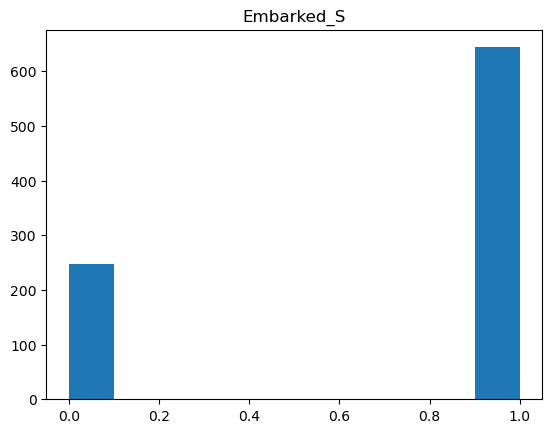

In [503]:
#distributions for all numeric variables 
for i in data1.columns:
    plt.hist(data1[i])
    plt.title(i)
    plt.show()

In [504]:
age_avg = data1['Age'].mean()  #算出Age這個欄位的平均值
age_std = data1['Age'].std()  #算出Age這個欄位的標準差
age_null_count = data1['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
data1['Age'][np.isnan(data1['Age'])] = age_null_random_list
data1

C:\Users\user\AppData\Local\Temp\ipykernel_26320\1149425186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Age'][np.isnan(data1['Age'])] = age_null_random_list


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,17.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [505]:
# look = pd.read_csv("titanic/train.csv",index_col="Survived")
# look = data1.set_index('Survived')
# look.loc[1]

In [506]:
data1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.067504,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.309083,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.067504,-0.309083,1.000000,-0.240311,-0.175036,0.081763,-0.092177,0.092177,0.044133,-0.001902,-0.044869
SibSp,-0.035322,0.083081,-0.240311,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.175036,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.081763,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.092177,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.092177,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.044133,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.001902,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624


In [507]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
x = data1.drop('Survived', axis=1)
y = data1['Survived']

# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [508]:
# AdaBoostClassifier
print("AdaBoostClassifier():")
# abc = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=1, algorithm='SAMME.R')
abc = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=1, algorithm='SAMME')

#Fit model on the training Data
abc.fit(x_train,y_train)
#Make prediction
predictions = abc.predict(x_test)
acc_score = accuracy_score(y_test,predictions)
print('Accuracy:{}'.format(acc_score))

AdaBoostClassifier():
Accuracy:0.7947761194029851


In [509]:
# load test data
test_data = pd.read_csv('titanic/test.csv')

age_avg = test_data['Age'].mean()  #算出Age這個欄位的平均值
age_std = test_data['Age'].std()  #算出Age這個欄位的標準差
age_null_count = test_data['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
test_data['Age'][np.isnan(test_data['Age'])] = age_null_random_list

x_test_tmp = test_data.drop(remove, axis=1)
test_data_dum = pd.get_dummies(x_test_tmp, columns=['Sex', 'Embarked'])
# print(data_dum)
x_test = pd.DataFrame(test_data_dum)
x_test = x_test.fillna(0)
x_test
# print(x_test.isna().sum())


C:\Users\user\AppData\Local\Temp\ipykernel_26320\2173171065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age'][np.isnan(test_data['Age'])] = age_null_random_list


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,21.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,43.0,0,0,8.0500,0,1,0,0,1


In [510]:
ac = AdaBoostClassifier()
# Fit model on the training Data
ac.fit(x_train, y_train)
fin_predictions = ac.predict(x_test)

output = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':fin_predictions})
output.to_csv('my_submission.csv', index=False)